In [1]:
#algunas librerías
from scipy import misc
from scipy import ndimage
import matplotlib.pylab as plt
import numpy as np

In [7]:
def escala_grises(I):
    g = 0.2989 * I[:,:,0] + 0.5870 * I[:,:,1] + 0.1140 * I[:,:,2]
    return g
    
def histograma(I, nbins = 32, show = True):
    h = np.histogram(I,nbins)
    plt.plot(h[1][:-1], h[0])
    if show:
        plt.show()
    
def histograma_acumulado(I, nbins=256, show = True):
    h = np.histogram(I,nbins)
    hc = np.cumsum(h[0])    
    plt.plot(h[1][:-1], hc)
    if show:        
        plt.show()
    return hc

def ev_histograma_acumulado(I):
    h = np.histogram(I,256)
    hc = np.cumsum(h[0])  
    return hc   

def muestra_imagen(I, show=True):
    plt.imshow(I, cmap="gray")
#     plt.axis('off')
    m = np.min(I)
    mx = np.max(I)
    plt.xlabel("["+str(m)+", "+str(mx)+"]")
    if show:
        plt.show()

# Ecualizado

Los tonos de gris de una imagen cualquiera, en general, no están ecualizados (no tienen una distribución uniforme)

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


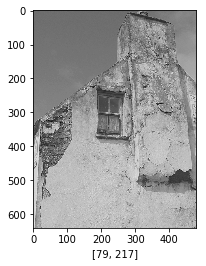

In [8]:
Im = misc.imread("ireland-06-contrastlow.tif")
muestra_imagen(Im)

## Histograma de frecuencias

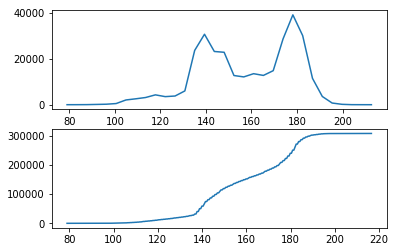

In [4]:
plt.subplot(211)
histograma(Im,show=False)
plt.subplot(212)
histograma_acumulado(Im,show=False)
plt.show()

## Ejemplo de imagen ecualizada

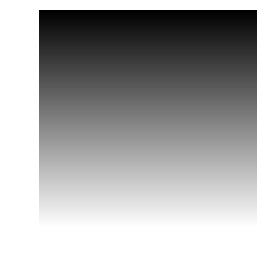

In [5]:
ren = 1000
col = 1000
Ip = np.zeros((ren, col))
for r in range(ren):
    Ip[r, :] = float(r)/1000*255
muestra_imagen(Ip)

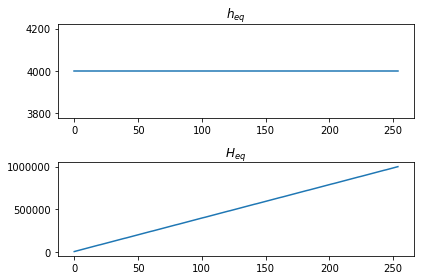

In [6]:
plt.subplot(211)
histograma(Ip, nbins=250, show=False)
plt.title("$h_{eq}$")
plt.subplot(212)
histograma_acumulado(Ip, show=False)
plt.title("$H_{eq}$")
plt.tight_layout()
plt.show()

### Observa

$$H_{eq}[I] = ren\times col \times \frac{I}{255}$$

## Ecualización de una imagen

Buscamos aplicar una transformación puntual a la imagen no ecualizada de manera que la distribución de intensidades de la nueva imagen sea lo más parecido a la uniforme.   

La transformación es muy simple. Buscamos que se cumpla la siguiente condición

$$H_{eq}(I'[r,c]) = H(I[r,c])$$

despejamos $$I'[r,c] = H_{eq}^{-1}[H(I[r,c])]$$

<b>Para evaluar $I'[r,c]$ seguir los siguientes pasos</b>

* Determinar el valor del histograma acumulado hasta $I[r,c]$: $H(I[r,c])$
* En el histograma $H_{eq}()$ determinar el primer valor, $z$, tal que $H_{eq}[z] \geq H(I[r,c])$ 
* Hacer $I'[r,c] = z$


### Nota:

El proceso puede simplificarse ya que la inversa de $H_{eq}$ puede evaluarse fácilmente. Observa que si $H_{eq}[I] = ren\times col \times \frac{I}{255}$ entonces $$H_{eq}^{-1}[A] = \frac{255}{ren\times col} A $$

siendo $A = H(I[r,c])$ el valor acumulado.